In [9]:
from fbm import FBM
from matplotlib import pyplot as plt

In [33]:
f = FBM(n=1024, hurst=0.5, length=1, method='daviesharte')

fbm_path1 = f.fbm()
times1 = f.times()

fbm_path2 = f.fbm()
times2 = f.times()

### Generacja ścieżek fBm

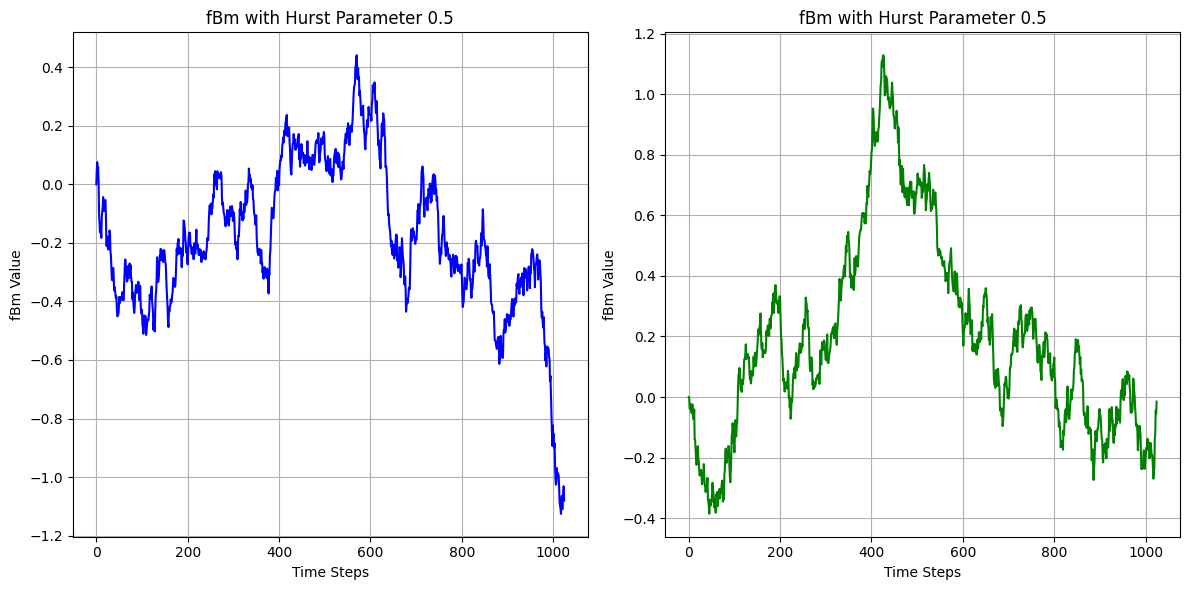

In [34]:
# plot fbm_sample with times
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.plot(fbm_path1, color='blue')
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('fBm Value')
ax1.grid(True)

# Plot the second fBm path
ax2.plot(fbm_path2, color='green')
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('fBm Value')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Histogramy dla ścieżek fbm

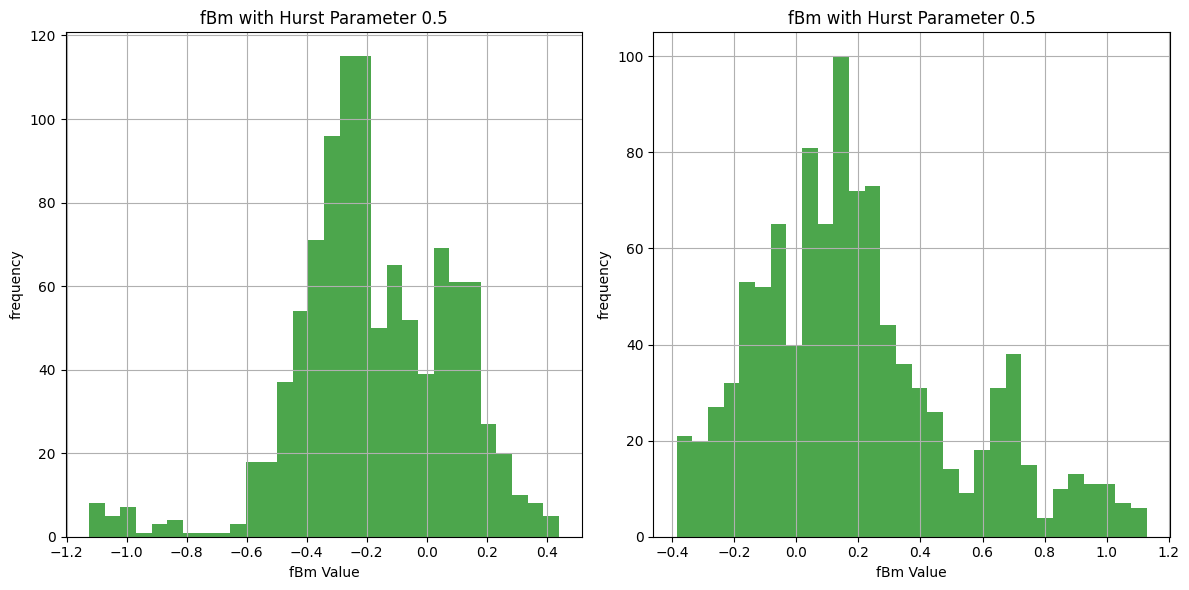

In [51]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.hist(fbm_path1, bins=30, color='green', alpha=0.7)
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('frequency')
ax1.grid(True)

# Plot the second fBm path
ax2.hist(fbm_path2, bins=30, color='green', alpha=0.7)
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('frequency')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Dystrybucja brzegowa fBm

 dla n ścieżek po czasie t

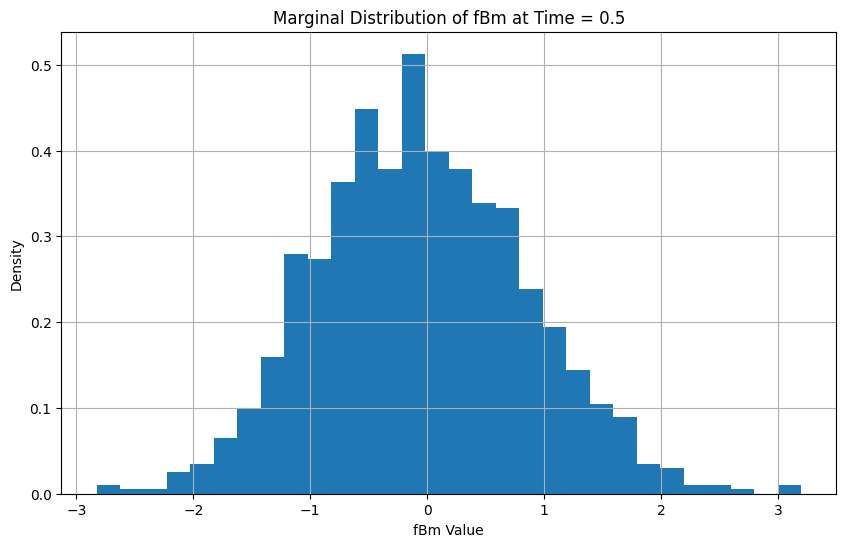

In [49]:
# Parameters
n_paths = 1000  # number of fBm paths to simulate
n_points = 100  # number of points in each path
hurst = 0.1     # Hurst parameter
time = 0.5     # time at which to observe the marginal distribution

# Generate fBm paths
f = FBM(n=n_points, hurst=hurst, length=time, method='daviesharte')
fbm_values_at_time = [f.fbm()[int(time*n_points)] for _ in range(n_paths)]  # Extract the end value of each path

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(fbm_values_at_time, bins=30, density=True)
plt.title(f'Marginal Distribution of fBm at Time = {time}')
plt.xlabel('fBm Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()